<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/exercicio_proposto_aula8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Exercício Proposto**

# Aplique as etapas de pré-processamento pertinentes no conjunto de dados *insurance* e utilize todas as variáveis disponíveis para prever a saída *smoker*!

A proposta deste exercício é realizar o pré-processamento dos dados, do banco de dados INSURANCE, iremos fazer a classificação e prever a saída SMOKER.

--- 
# 1° Importação dos Dados via Github


In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---

# 2° Análise exploratória dos dados


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 9.8 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


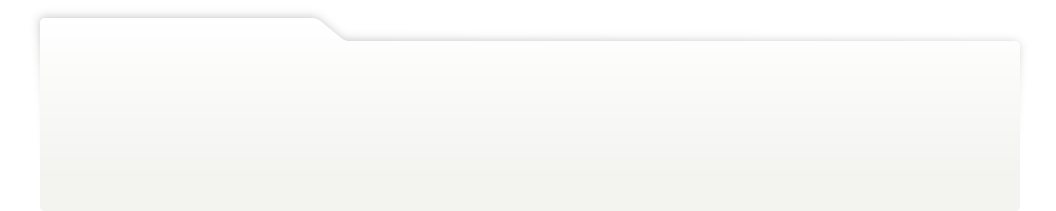
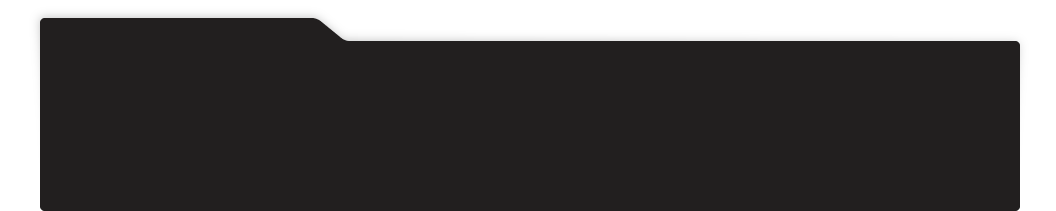
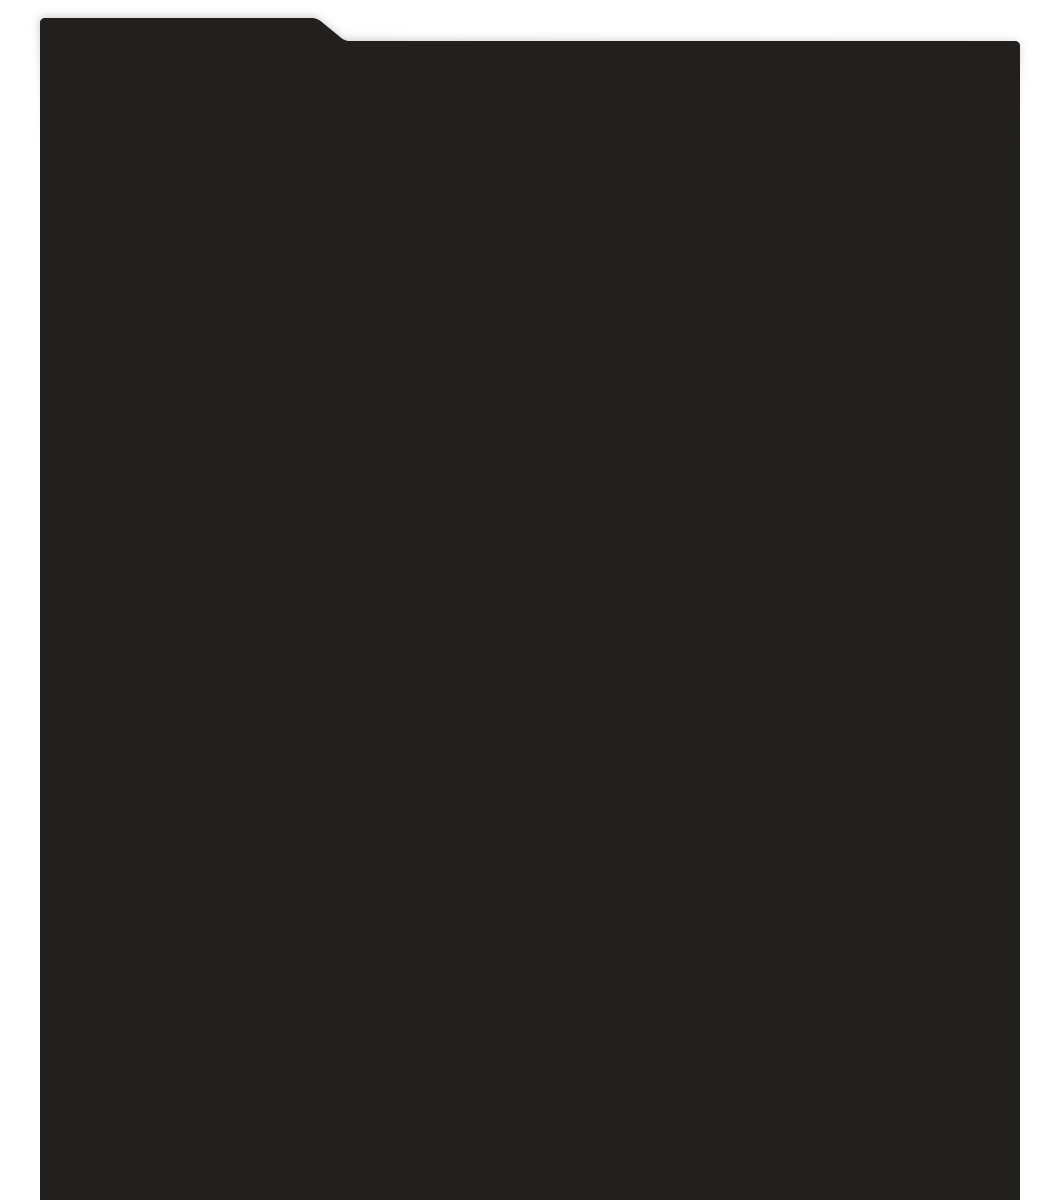
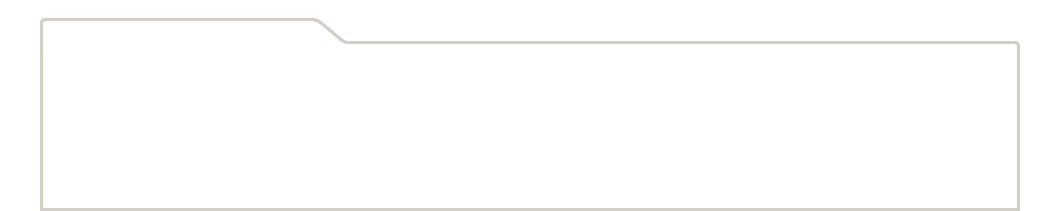
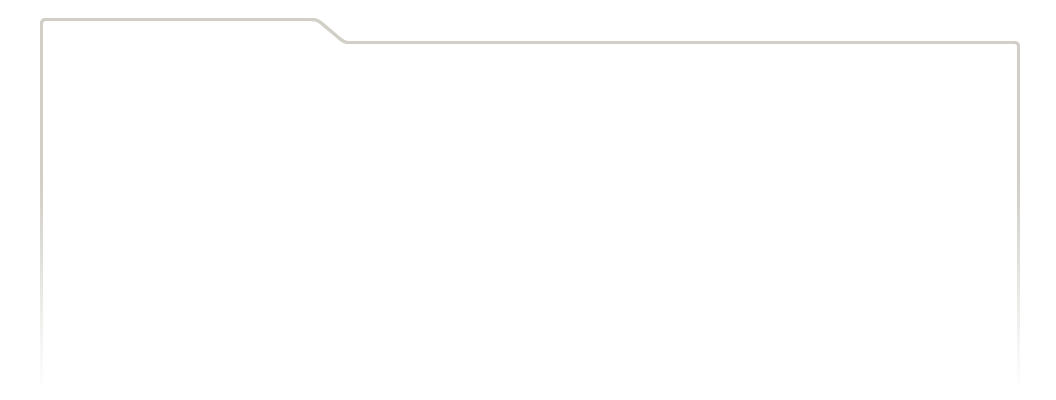
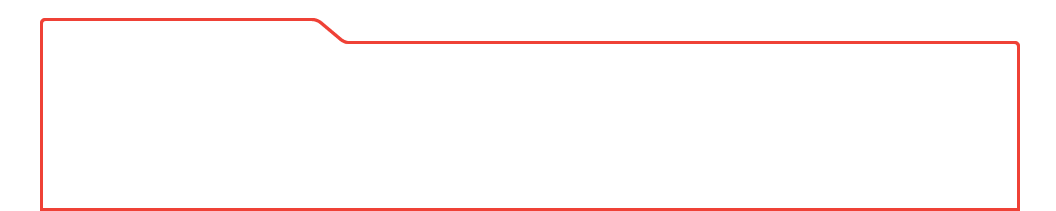
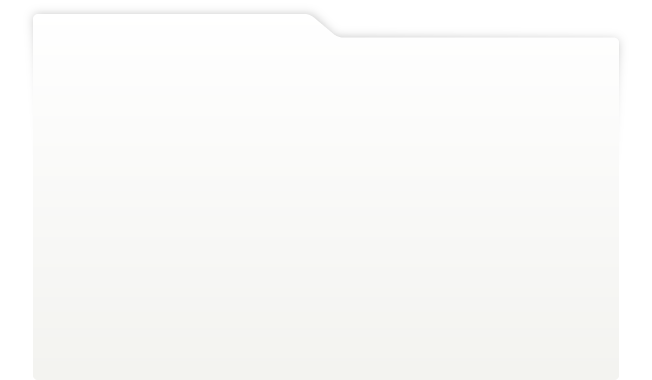
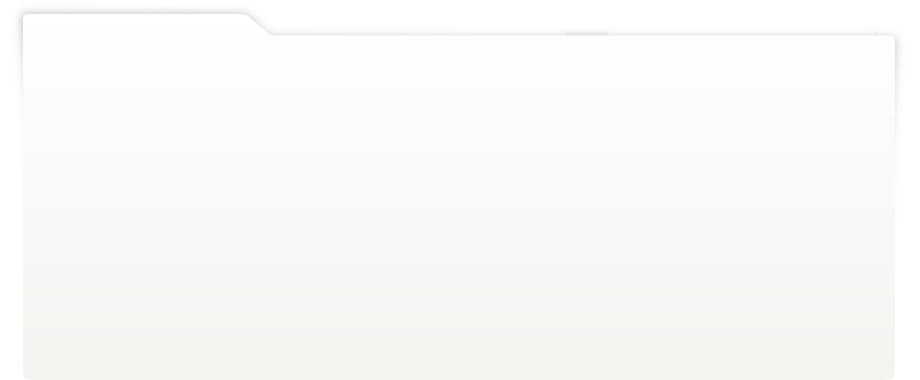
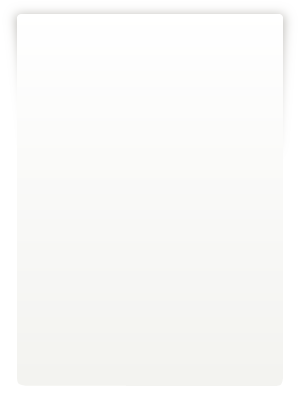
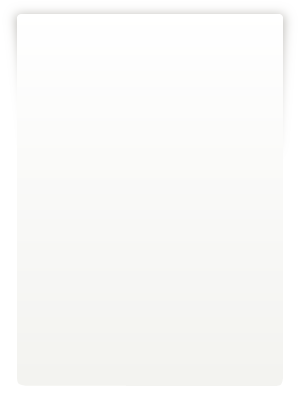
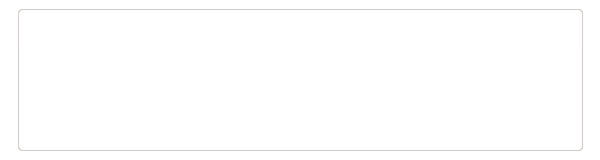
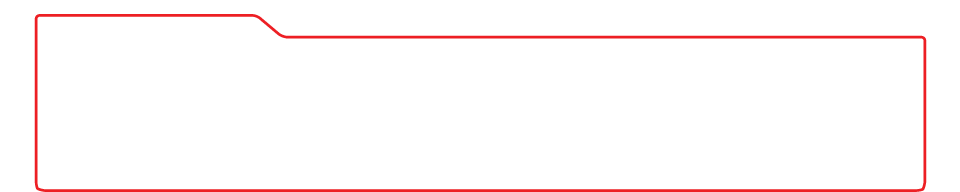
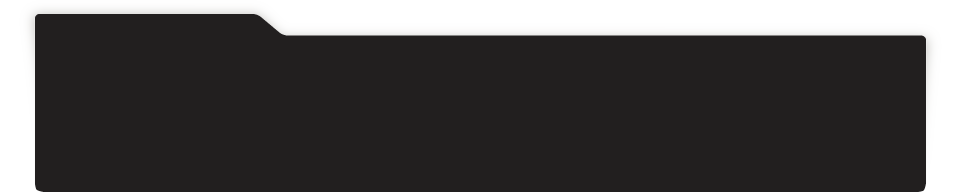
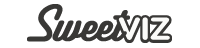
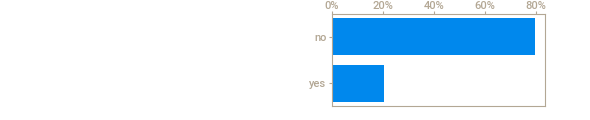
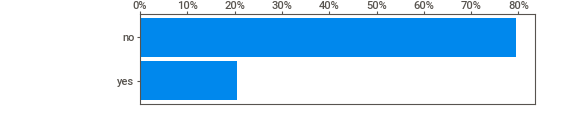
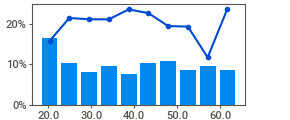
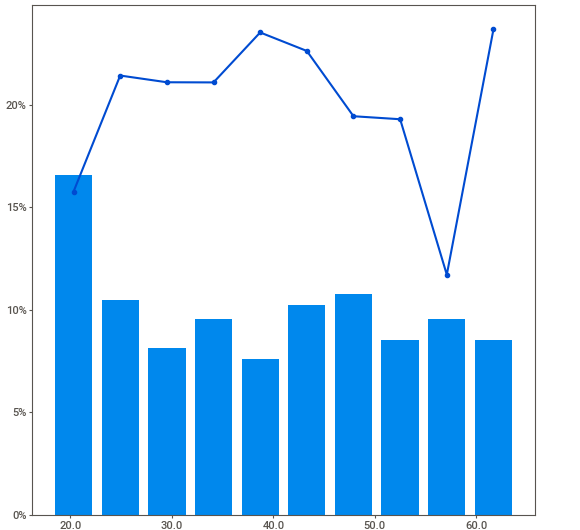
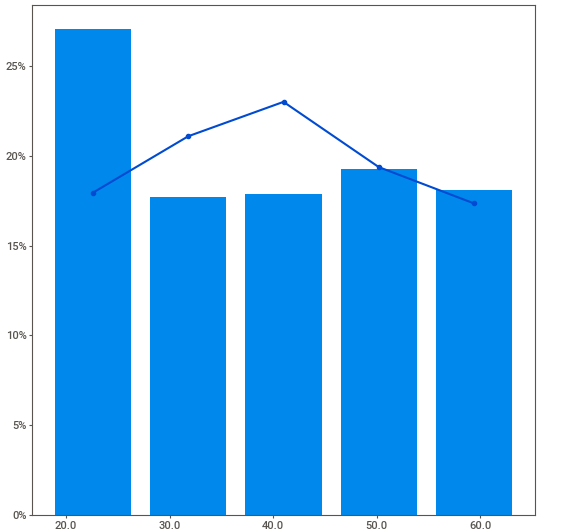
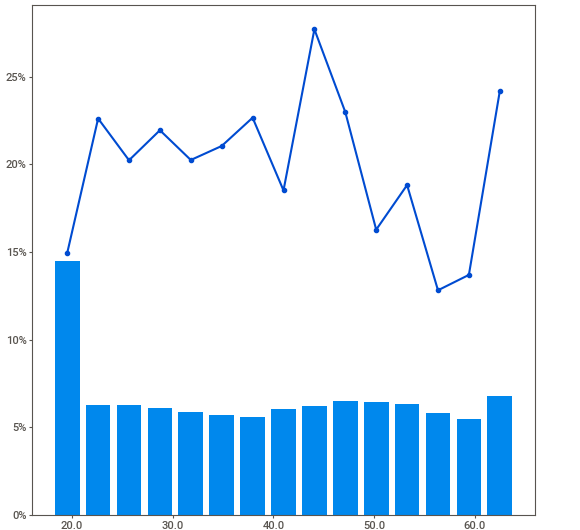
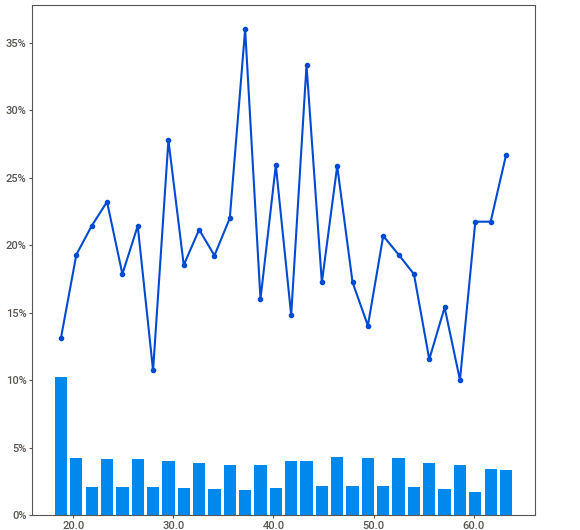
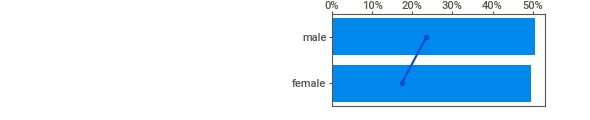
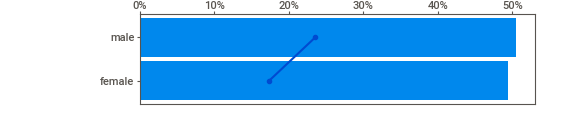
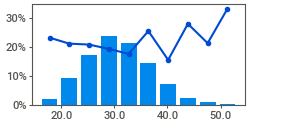
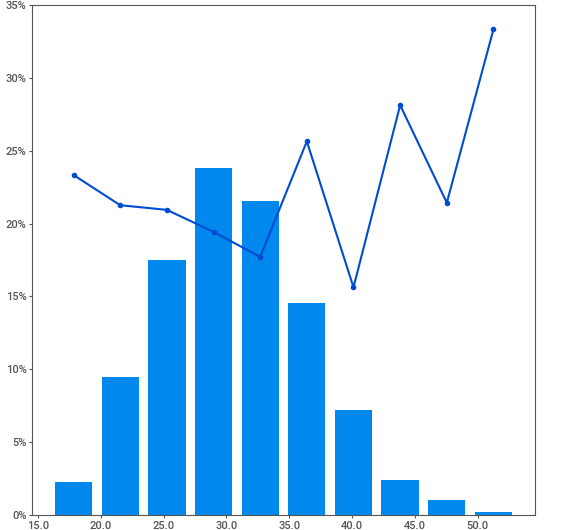
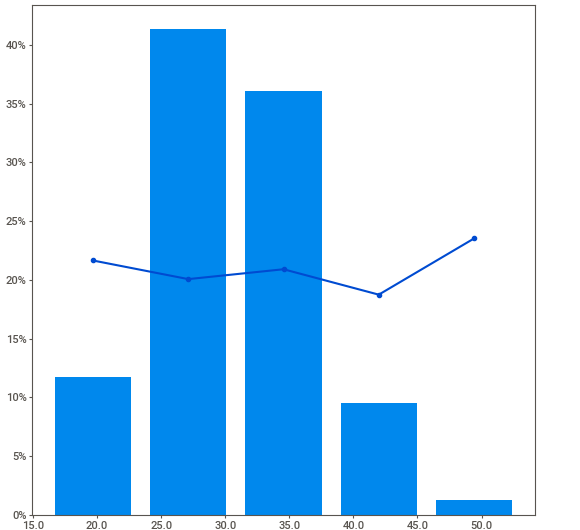
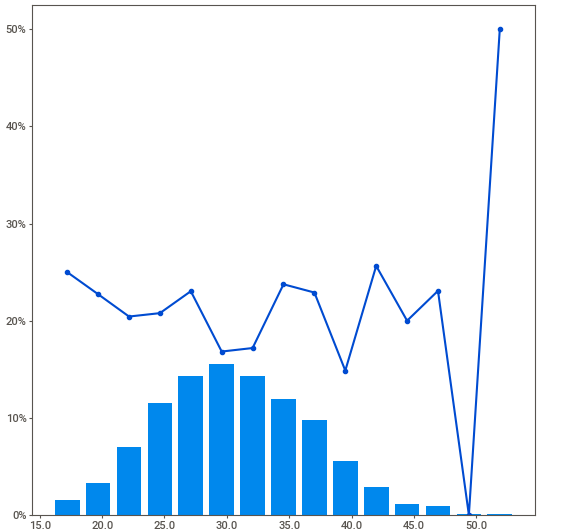
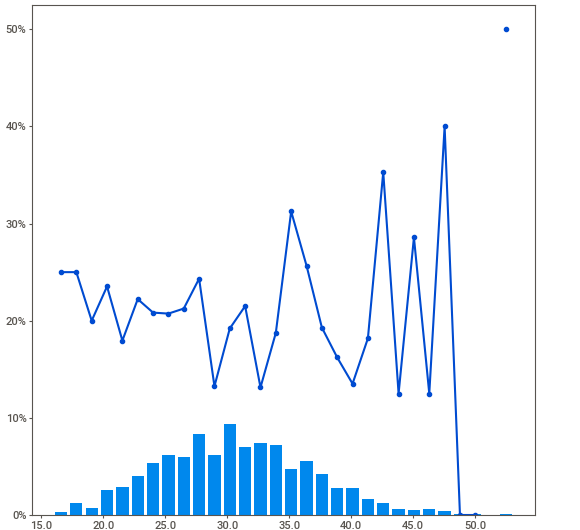
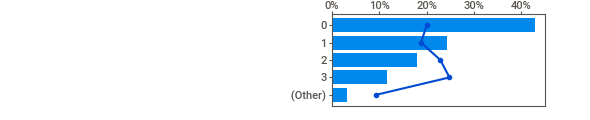
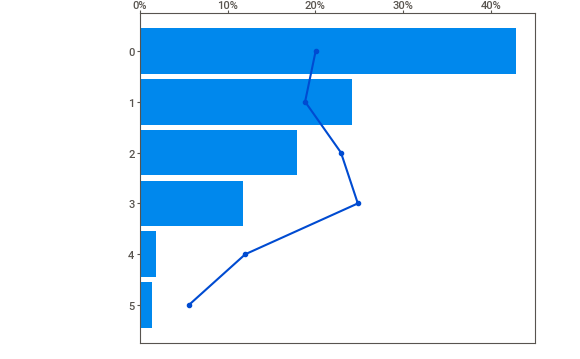
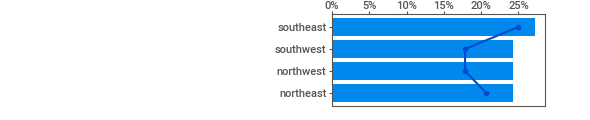
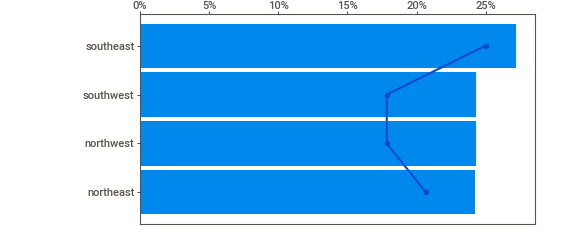
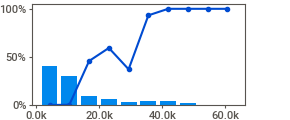
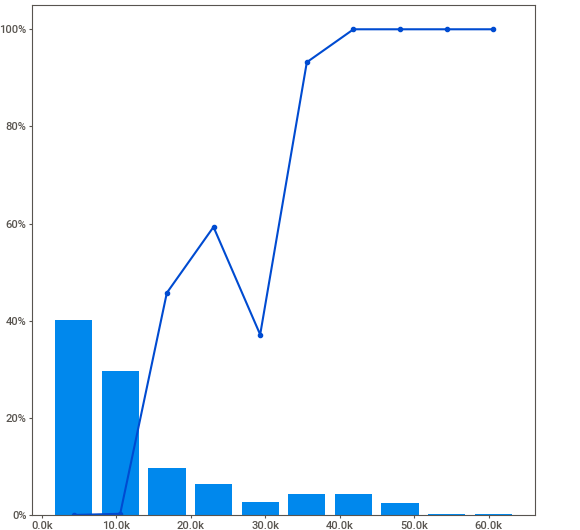
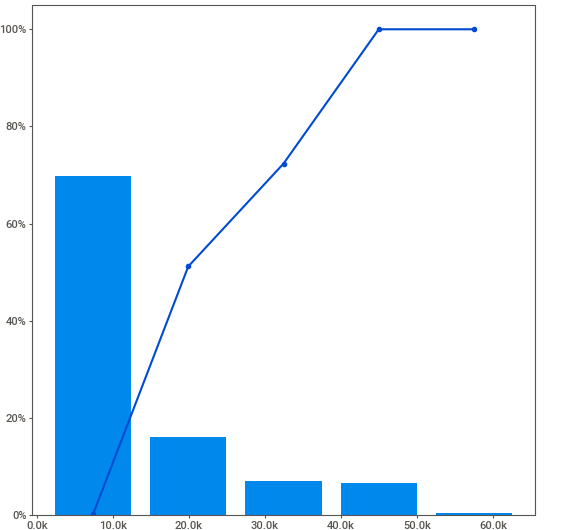
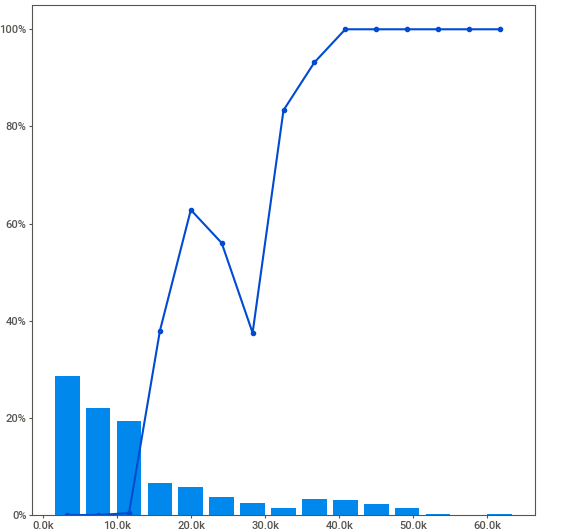
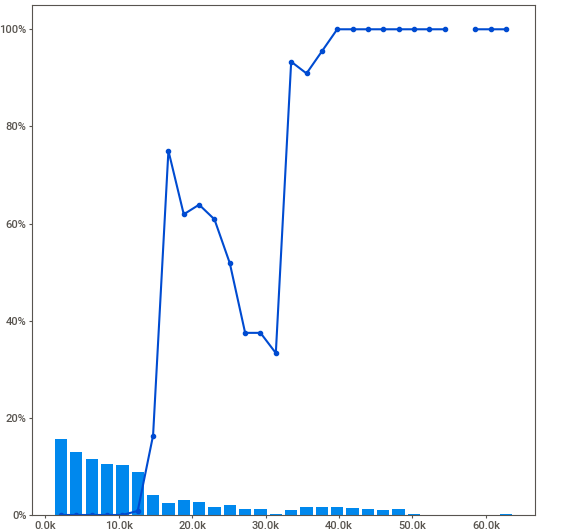
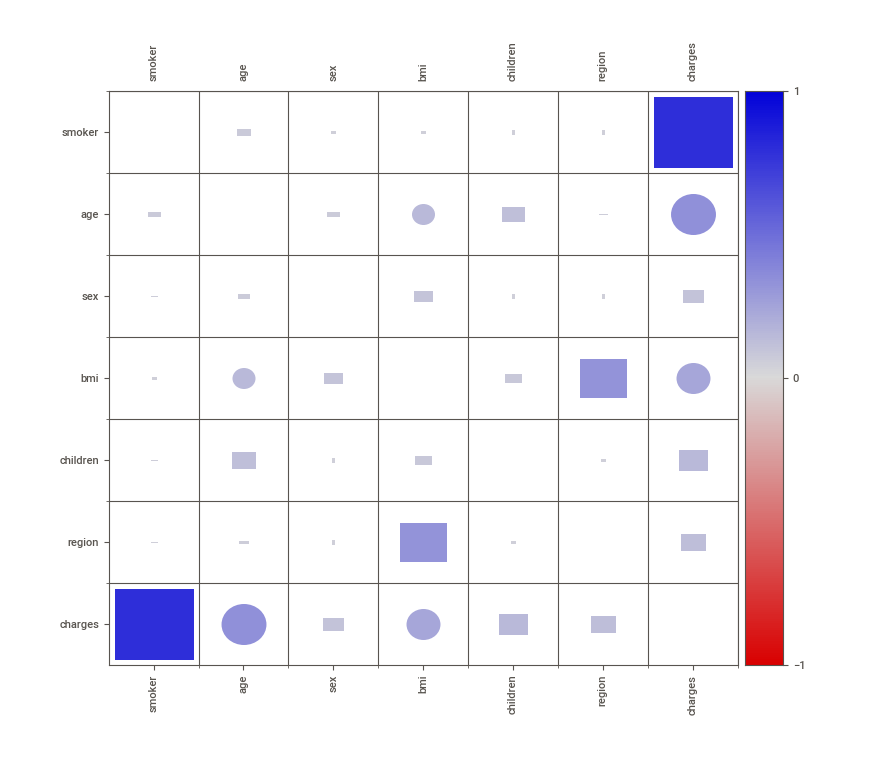
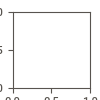

In [3]:
# instalando biblioteca de visualização

!pip install sweetviz 
import sweetviz as sv
eda = sv.analyze(source = dados, target_feat = 'smoker')
eda.show_notebook()

---
# 3° Pré-processamento dos dados 

In [2]:
dados.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


 # 3.1 descarte de variáveis não importantes 

In [5]:
#Optei por não descartar nenhuma variaável, pois entendi que todas podem agregar na minha modelagem

 # 3.2 Verificação dos dados Faltantes 

In [3]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
import missingno as missing

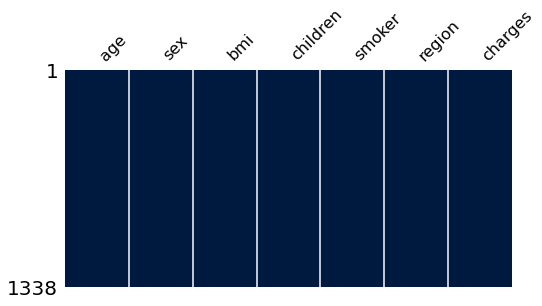

In [5]:
missing.matrix(dados, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

 # 3.3 Categorização de variaveis continuas

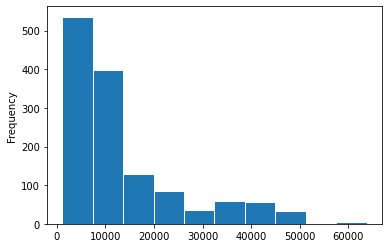

In [6]:
dados['charges'].plot(kind = 'hist', edgecolor = 'white');

In [7]:
dados['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [8]:
def cobranca(x):
    if x < 5000:
      return '- 5K'
    elif x < 10000:
      return '- 10K'
    elif x < 20000:
      return '- 20K'
    elif x < 40000:
      return '- 40K'
    else:
      return '+ 40K'

dados['charges'] = dados['charges'].apply(cobranca)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,- 20K
1,18,male,33.770,1,no,southeast,- 5K
2,28,male,33.000,3,no,southeast,- 5K
3,33,male,22.705,0,no,northwest,- 40K
4,32,male,28.880,0,no,northwest,- 5K


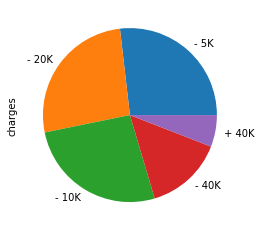

In [9]:
dados['charges'].value_counts().plot(kind ='pie');

 # 3.4 Agrupamento de categorias

In [10]:
dados['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
def filhos(x):
    if x == 0:
      return '0 -'
    elif x <= 1:
      return '1'
    elif x <= 2:
      return '2'
    else:
      return '3+'

dados['children'] = dados['children'].apply(filhos)

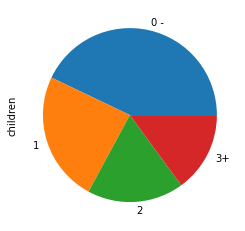

In [12]:
dados['children'].value_counts().plot(kind = 'pie');

In [13]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0 -,yes,southwest,- 20K
1,18,male,33.770,1,no,southeast,- 5K
2,28,male,33.000,3+,no,southeast,- 5K
3,33,male,22.705,0 -,no,northwest,- 40K
4,32,male,28.880,0 -,no,northwest,- 5K


 # 3.5 Dummyficação de variáveis

In [14]:
pd.get_dummies(dados['region'], drop_first = True)

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [15]:
# fazendo em mais de uma variavel e salvando 

variaveis_cat = ['region', 'sex', 'charges', 'children']

dados = pd.get_dummies(dados, columns = variaveis_cat, drop_first = True)

In [16]:
dados

,age,bmi,smoker,region_northwest,region_southeast,region_southwest,sex_male,charges_- 10K,charges_- 20K,charges_- 40K,charges_- 5K,children_1,children_2,children_3+
0,19,27.900,yes,0,0,1,0,0,1,0,0,0,0,0
1,18,33.770,no,0,1,0,1,0,0,0,1,1,0,0
2,28,33.000,no,0,1,0,1,0,0,0,1,0,0,1
3,33,22.705,no,1,0,0,1,0,0,1,0,0,0,0
4,32,28.880,no,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,no,1,0,0,1,0,1,0,0,0,0,1
1334,18,31.920,no,0,0,0,0,0,0,0,1,0,0,0
1335,18,36.850,no,0,1,0,0,0,0,0,1,0,0,0
1336,21,25.800,no,0,0,1,0,0,0,0,1,0,0,0


 # 3.6 Escala de variaveis continuas 

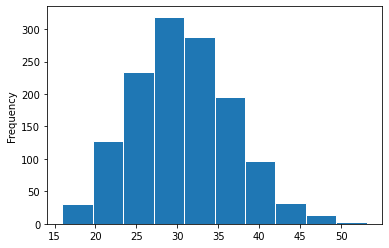

In [17]:
dados['bmi'].plot(kind = 'hist', edgecolor = 'white');

In [18]:
dados['bmi'] = dados['bmi']/100

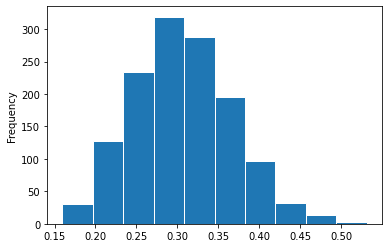

In [19]:
dados['bmi'].plot(kind = 'hist', edgecolor = 'white');

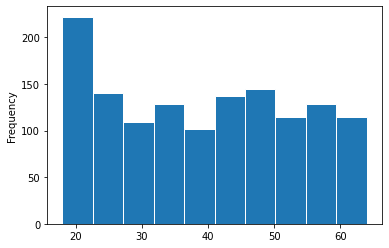

In [20]:
dados['age'].plot(kind = 'hist', edgecolor = 'white');

In [21]:
# padronização

import numpy as np
media = np.mean(dados['age'])
desvio = np.std(dados['age'])

dados['age'] = (dados['age'] - media)/desvio

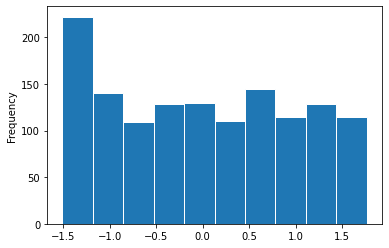

In [22]:
dados['age'].plot(kind = 'hist', edgecolor = 'white');

In [23]:
dados['age'].describe().round(2)

count    1338.00
mean       -0.00
std         1.00
min        -1.51
25%        -0.87
50%        -0.01
75%         0.84
max         1.77
Name: age, dtype: float64

In [24]:
dados.head()

,age,bmi,smoker,region_northwest,region_southeast,region_southwest,sex_male,charges_- 10K,charges_- 20K,charges_- 40K,charges_- 5K,children_1,children_2,children_3+
0,-1.438764,0.27900,yes,0,0,1,0,0,1,0,0,0,0,0
1,-1.509965,0.33770,no,0,1,0,1,0,0,0,1,1,0,0
2,-0.797954,0.33000,no,0,1,0,1,0,0,0,1,0,0,1
3,-0.441948,0.22705,no,1,0,0,1,0,0,1,0,0,0,0
4,-0.513149,0.28880,no,1,0,0,1,0,0,0,1,0,0,0


In [25]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})

ultima visualização dos dados 

In [26]:
dados.head(5)

,age,bmi,smoker,region_northwest,region_southeast,region_southwest,sex_male,charges_- 10K,charges_- 20K,charges_- 40K,charges_- 5K,children_1,children_2,children_3+
0,-1.438764,0.27900,1,0,0,1,0,0,1,0,0,0,0,0
1,-1.509965,0.33770,0,0,1,0,1,0,0,0,1,1,0,0
2,-0.797954,0.33000,0,0,1,0,1,0,0,0,1,0,0,1
3,-0.441948,0.22705,0,1,0,0,1,0,0,1,0,0,0,0
4,-0.513149,0.28880,0,1,0,0,1,0,0,0,1,0,0,0


 # Machine learning ( Classificação)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 100)

In [29]:
X = dados.drop('smoker', axis = 1)
y = dados['smoker']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)


In [30]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Árvore (prof = 7),0.947176,0.904952,0.850957,0.931498,0.875235
Bagging,0.944836,0.888493,0.852854,0.923915,0.868299
Árvore (prof = 5),0.933931,0.932909,0.788979,0.933551,0.853220
"Random Forest (arvs = 100, prof = 7)",0.929823,0.859771,0.813560,0.903822,0.833566
"Random Forest (arvs = 50, prof = 7)",0.927346,0.846468,0.812060,0.897319,0.825886
Regressão Logística,0.918543,0.788578,0.813560,0.870294,0.798011
5-NN,0.894559,0.751728,0.743065,0.841539,0.744361
15-NN,0.881233,0.719667,0.710155,0.821257,0.712177
25-NN,0.874965,0.662078,0.712577,0.795937,0.682988
"Random Forest (arvs = 50, prof = 5)",0.858993,0.499308,0.732319,0.725458,0.588564
